In [17]:
from PIL import Image
import sys
sys.path.append('..')
import numpy as np
from invertransforms.affine.affine import RandomAffine, Affine
import torch
import matplotlib.pyplot as plt

In [11]:
img = np.array(Image.open("t018.tif")) # from the cell tracking challenge Fluo-N2DH-GOWT1 dataset https://paperswithcode.com/dataset/fluo-n2dh-gowt1

In [19]:
ra = RandomAffine(degrees = 180, translate=[0.1,0.1], scale=[1,1], shear = [-2,2], fill = -100)

In [20]:
img.shape

(1024, 1024)

In [21]:
im_tr = ra(torch.Tensor(img[None,None,...]))

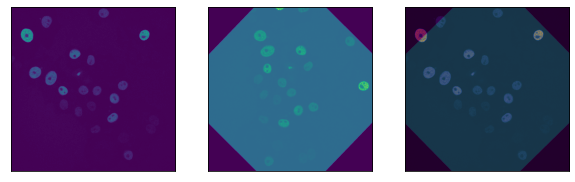

In [26]:
fig = plt.figure(figsize = (10,5))
ax = fig.subplots(1,3)

ax[0].imshow(img)
ax[0].get_yaxis().set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[1].imshow(im_tr.squeeze())
ax[1].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)

ax[2].imshow(ra.inverse_transform(im_tr).squeeze())
ax[2].imshow(img,alpha = 0.5,cmap='inferno')
ax[2].get_yaxis().set_visible(False)
ax[2].get_xaxis().set_visible(False)



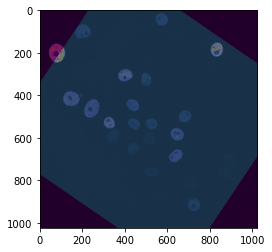

In [49]:
plt.imshow(ra.inverse_transform(im_tr).squeeze())



In [45]:
def a(*params):
    print(params)

In [52]:
a = Affine(*ra.params, fill = -100)

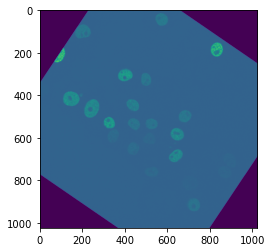

In [55]:
plt.imshow(a.inverse_transform(a(torch.Tensor(img[None,None,...]))).squeeze())

In [17]:
#ra._matrix = [-27.082250595092773, (0,0), 0.20000000298023224, (2,0)]

In [18]:
ra._matrix

[4.705590528468965,
 1.6993832810652074,
 0.0,
 -1.5331907738593473,
 4.759130730069781,
 0.0]

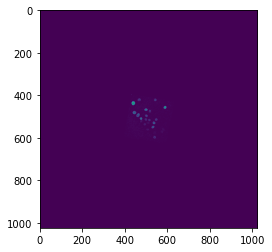

In [19]:
plt.imshow(ra(torch.Tensor(img[None,None,...]),reuse_params = True).squeeze())

In [20]:
matrix = torch.tensor(ra._matrix+[0,0,1]).reshape(3, 3)

In [21]:
F.get_image_size(torch.Tensor(img[None,None,...]))

[1024, 1024]

In [22]:
ra._matrix

[4.912529852180123,
 0.9473838762718741,
 0.0,
 -0.7748896066928314,
 4.9395895935169944,
 0.0]

In [23]:
matrix.inverse()

tensor([[ 0.1976, -0.0379, -0.0000],
        [ 0.0310,  0.1965, -0.0000],
        [ 0.0000,  0.0000,  1.0000]])

In [24]:
torch.FloatTensor(_invert_affine_matrix(ra._matrix)).reshape(1,2,3)

tensor([[[ 0.1976, -0.0379, -0.0000],
         [ 0.0310,  0.1965, -0.0000]]])

In [25]:
F_t.affine(im_tr,ra._matrix).squeeze().unique()

tensor([  0.,   3.,   6.,  10.,  13.,  16.,  17.,  20.,  23.,  27.,  30.,  34.,
         37.,  40.,  44.,  47.,  51.,  61.,  64.,  68.,  71.,  74.,  78.,  85.,
         98., 102., 108., 119., 130.])

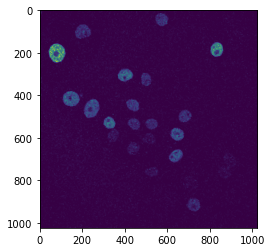

In [34]:
plt.imshow(F_t.affine(im_tr,matrix.inverse()[:-1,:].flatten().tolist()).squeeze())
plt.imshow(img,alpha = 0.2,cmap='inferno')


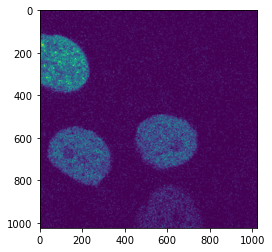

In [29]:
plt.imshow(F_t.affine(torch.Tensor(img[None,None,...]),matrix.inverse()[:-1,:].flatten().tolist()).squeeze())

In [35]:
im_in_tr = ra.inverse_transform(im_tr)

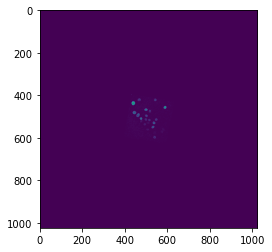

In [36]:
plt.imshow(im_tr.squeeze())

In [37]:
im_in_tr.unique()

tensor([  0.,   3.,   6.,   9.,  10.,  13.,  16.,  17.,  20.,  23.,  27.,  30.,
         34.,  37.,  40.,  44.,  47.,  51.,  54.,  57.,  61.,  64.,  68.,  71.,
         74.,  78.,  81.,  83.,  85.,  88.,  91.,  95.,  98., 102., 103., 105.,
        106., 108., 110., 112., 113., 115., 117., 119., 120., 122., 123., 125.,
        129., 132., 136., 137., 139., 140., 142., 146., 147., 149., 151., 153.,
        156., 160., 166., 168., 171., 178.])

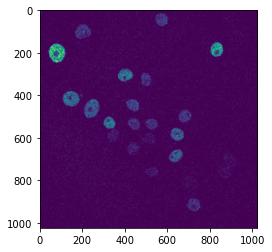

In [39]:
plt.imshow(im_in_tr.squeeze())

In [20]:
F.InterpolationMode.NEAREST == ra.interpolation

True